# Feature scaling
---
- Author: Diego Inácio
- GitHub: [github.com/diegoinacio](https://github.com/diegoinacio)
- Notebook: [feature-scaling.ipynb](https://github.com/diegoinacio/data-science-notebooks/blob/master/data-analytics/feature-scaling.ipynb)
---
Overview and practical applications of key *feature scaling* methods.

In [1]:
# Data analysis
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

# Feature engineering
from sklearn.model_selection import train_test_split

# Model (SVM Classification)
from sklearn.svm import SVC

# Metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [2]:
plt.rcParams['figure.figsize'] = (16, 8)

In [3]:
import warnings
warnings.filterwarnings('ignore')

## 0. Data
---
Before we start talking let's first start acquiring and preparing our data to run a classification model.

### Download from Kaggle
---
For this experiment, we firstly are going to download the [diamond prices](https://www.kaggle.com/datasets/shivam2503/diamonds) dataset.

In [4]:
!kaggle datasets download -d "shivam2503/diamonds"


  0%|          | 0.00/733k [00:00<?, ?B/s]
100%|##########| 733k/733k [00:00<00:00, 11.1MB/s]


In [5]:
!unzip "diamonds.zip"

Archive:  diamonds.zip
  inflating: diamonds.csv            


### Data preparation
---
Prepare our dataset to run a classification model based on numeric independent variable.

In [6]:
# Read data
df_diamonds = pd.read_csv("diamonds.csv")
df_diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
df_diamonds = df_diamonds.drop(['Unnamed: 0'],axis=1)
df_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
df_diamonds.groupby("color").count()

,carat,cut,clarity,depth,table,price,x,y,z
color,,,,,,,,,
D,6775,6775,6775,6775,6775,6775,6775,6775,6775
E,9797,9797,9797,9797,9797,9797,9797,9797,9797
F,9542,9542,9542,9542,9542,9542,9542,9542,9542
G,11292,11292,11292,11292,11292,11292,11292,11292,11292
H,8304,8304,8304,8304,8304,8304,8304,8304,8304
I,5422,5422,5422,5422,5422,5422,5422,5422,5422
J,2808,2808,2808,2808,2808,2808,2808,2808,2808


In [9]:
# Filter data and get just 1 categorical feature
df_classification = (df_diamonds
    .where(df_diamonds.color == "G")
    .where(df_diamonds.clarity == "VS2")
    .dropna()
)

# Numerical dependent features
X = df_classification[[
    "carat", "depth", "table", 
    "price", "x", "y", "z"
]]

# Target data (classification)
y = df_classification["cut"]

In [10]:
X.describe()

,carat,depth,table,price,x,y,z
count,2347.000000,2347.000000,2347.000000,2347.000000,2347.000000,2347.000000,2347.000000
mean,0.797946,61.721176,57.432126,4416.256498,5.763485,5.763255,3.556072
std,0.413574,1.361613,2.067357,4115.480267,1.049898,1.043642,0.654238
min,0.230000,44.000000,53.000000,369.000000,0.000000,0.000000,0.000000
25%,0.400000,61.100000,56.000000,833.000000,4.740000,4.740000,2.920000
50%,0.720000,61.800000,57.000000,2770.000000,5.790000,5.800000,3.590000
75%,1.060000,62.500000,59.000000,6532.000000,6.560000,6.570000,4.050000
max,2.090000,69.800000,67.000000,18700.000000,8.270000,8.210000,5.230000


## 1. What is *feature scaling*?
---
*Feature scaling* is a process used to rescale and normalize independent variables. This is an important process because sometimes columns can have different units and this can impact the performance of many algorithms that are based on dissimilarity between variables.

For example, if we have a classifier based on distance metrics (like KNN, SVM and etc), our model may not work correctly if our variables have different ranges in terms of magnitude. Let's se how our model performs without applying feature scaling:

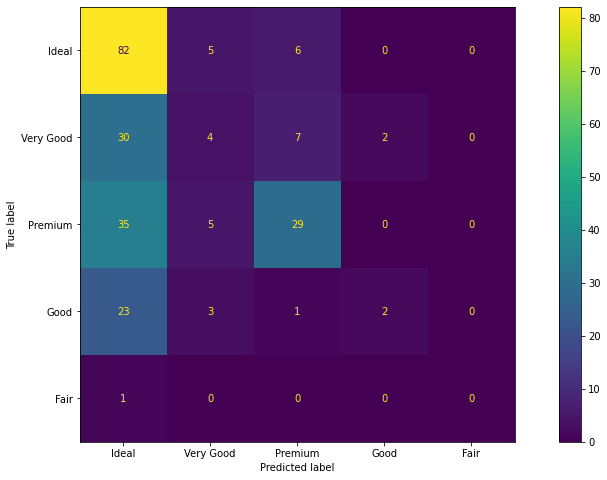

In [11]:
# Split model data
X_train, X_test, y_train, y_test = (
    train_test_split(X, y, random_state=0, test_size=0.1)
)

LABELS = y_train.unique()

# Model | SVC Classification
svc = SVC(gamma="auto")
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

# Confusion matrix
CM = confusion_matrix(y_test, y_pred, labels=LABELS)
disp = ConfusionMatrixDisplay(confusion_matrix=CM,display_labels=LABELS)
disp.plot()
plt.show()

In [12]:
print(classification_report(y_test, y_pred, labels=LABELS))

              precision    recall  f1-score   support

       Ideal       0.48      0.88      0.62        93
   Very Good       0.24      0.09      0.13        43
     Premium       0.67      0.42      0.52        69
        Good       0.50      0.07      0.12        29
        Fair       0.00      0.00      0.00         1

    accuracy                           0.50       235
   macro avg       0.38      0.29      0.28       235
weighted avg       0.49      0.50      0.44       235



### 1.1. Normalization
---
Normalization is probably the most common method for scaling features. This is based on *minimums* and *maximums*, and adjusts all variables $X$ to the range $[0, 1]$.

$$ \large
x' = \frac{x - min(x)}{max(x) - min(x)}
$$

where:
- $x$ is an independent variable;
- $min(x)$ is the minimum value of $x$;
- $max(x)$ is the maximum value of $x$.

In [13]:
X_ = (X - X.min())/(X.max() - X.min())
X_.describe()

,carat,depth,table,price,x,y,z
count,2347.000000,2347.000000,2347.000000,2347.000000,2347.000000,2347.000000,2347.000000
mean,0.305347,0.686867,0.316580,0.220788,0.696915,0.701980,0.679937
std,0.222352,0.052776,0.147668,0.224509,0.126953,0.127118,0.125093
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.091398,0.662791,0.214286,0.025312,0.573156,0.577345,0.558317
50%,0.263441,0.689922,0.285714,0.130980,0.700121,0.706456,0.686424
75%,0.446237,0.717054,0.428571,0.336206,0.793229,0.800244,0.774379
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


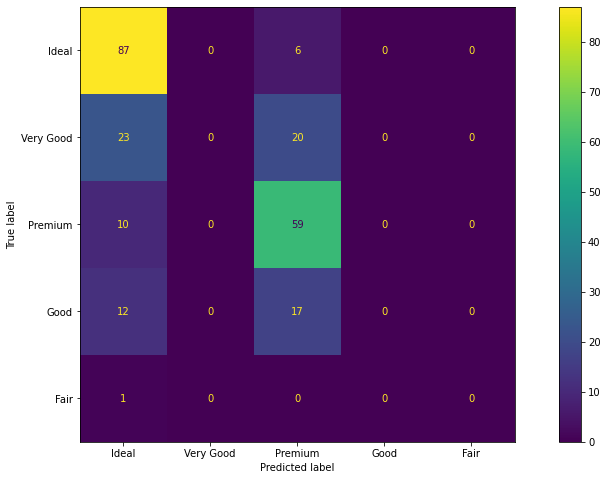

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, random_state=0, test_size=0.1)

svc = SVC(gamma="auto")
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

CM = confusion_matrix(y_test, y_pred, labels=LABELS)
disp = ConfusionMatrixDisplay(confusion_matrix=CM,display_labels=LABELS)
disp.plot()
plt.show()

In [15]:
print(classification_report(y_test, y_pred, labels=LABELS))

              precision    recall  f1-score   support

       Ideal       0.65      0.94      0.77        93
   Very Good       0.00      0.00      0.00        43
     Premium       0.58      0.86      0.69        69
        Good       0.00      0.00      0.00        29
        Fair       0.00      0.00      0.00         1

    accuracy                           0.62       235
   macro avg       0.25      0.36      0.29       235
weighted avg       0.43      0.62      0.51       235



Alternatively, we can redimension the interval of our variable to another range $[a, b]$.

$$ \large
x' = a + (b - a) \cdot \frac{x - min(x)}{max(x) - min(x)}
$$

where $a$ and $b$ are the left and right limit of the range, respectively.

In [16]:
a, b = 1, 5
X_ = a + (b - a)*(X - X.min())/(X.max() - X.min())
X_.describe()

,carat,depth,table,price,x,y,z
count,2347.000000,2347.000000,2347.000000,2347.000000,2347.000000,2347.000000,2347.000000
mean,2.221390,3.747469,2.266322,1.883150,3.787659,3.807920,3.719749
std,0.889406,0.211103,0.590673,0.898037,0.507811,0.508474,0.500373
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.365591,3.651163,1.857143,1.101249,3.292624,3.309379,3.233270
50%,2.053763,3.759690,2.142857,1.523921,3.800484,3.825822,3.745698
75%,2.784946,3.868217,2.714286,2.344826,4.172914,4.200974,4.097514
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


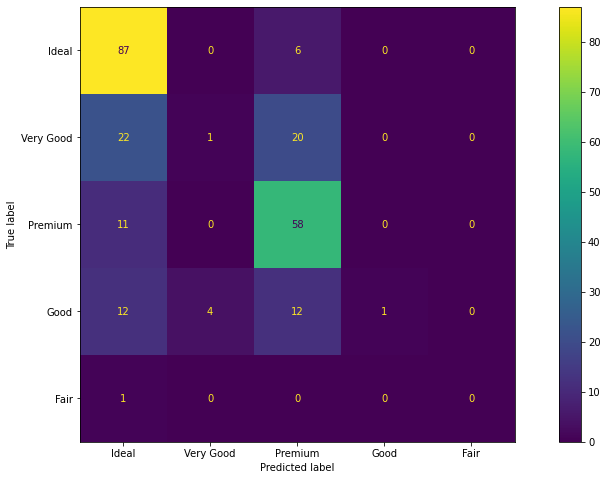

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, random_state=0, test_size=0.1)

svc = SVC(gamma="auto")
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

CM = confusion_matrix(y_test, y_pred, labels=LABELS)
disp = ConfusionMatrixDisplay(confusion_matrix=CM,display_labels=LABELS)
disp.plot()
plt.show()

In [18]:
print(classification_report(y_test, y_pred, labels=LABELS))

              precision    recall  f1-score   support

       Ideal       0.65      0.94      0.77        93
   Very Good       0.20      0.02      0.04        43
     Premium       0.60      0.84      0.70        69
        Good       1.00      0.03      0.07        29
        Fair       0.00      0.00      0.00         1

    accuracy                           0.63       235
   macro avg       0.49      0.37      0.32       235
weighted avg       0.60      0.63      0.53       235



### 1.2. Mean Normalization
---
This is similar to simple normalization, but is centrilized to the origin.

$$ \large
x' = \frac{x - \overline{x}}{max(x) - min(x)}
$$

where:
- $\overline{x}$ is the average (or arithmetic mean) value of the variable.

In [19]:
X_ = (X - X.mean())/(X.max() - X.min())
X_.describe()

,carat,depth,table,price,x,y,z
count,2.347000e+03,2.347000e+03,2.347000e+03,2.347000e+03,2.347000e+03,2.347000e+03,2.347000e+03
mean,7.265882e-17,3.501436e-16,-4.904471e-16,6.054902e-18,-3.632941e-17,-6.660392e-17,-1.816471e-17
std,2.223516e-01,5.277568e-02,1.476683e-01,2.245093e-01,1.269526e-01,1.271184e-01,1.250932e-01
min,-3.053475e-01,-6.868673e-01,-3.165804e-01,-2.207875e-01,-6.969148e-01,-7.019799e-01,-6.799372e-01
25%,-2.139496e-01,-2.407659e-02,-1.022947e-01,-1.954752e-01,-1.237588e-01,-1.246352e-01,-1.216198e-01
50%,-4.190662e-02,3.055195e-03,-3.086615e-02,-8.980724e-02,3.206131e-03,4.475613e-03,6.487269e-03
75%,1.408891e-01,3.018698e-02,1.119910e-01,1.154189e-01,9.631375e-02,9.826368e-02,9.444138e-02
max,6.946525e-01,3.131327e-01,6.834196e-01,7.792125e-01,3.030852e-01,2.980201e-01,3.200628e-01


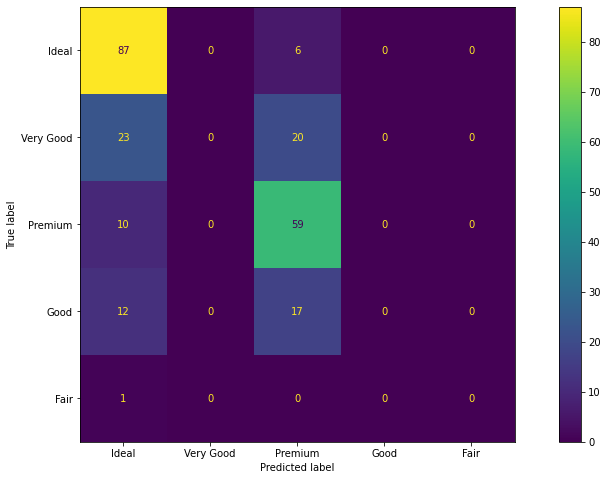

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, random_state=0, test_size=0.1)

svc = SVC(gamma="auto")
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

CM = confusion_matrix(y_test, y_pred, labels=LABELS)
disp = ConfusionMatrixDisplay(confusion_matrix=CM,display_labels=LABELS)
disp.plot()
plt.show()

In [21]:
print(classification_report(y_test, y_pred, labels=LABELS))

              precision    recall  f1-score   support

       Ideal       0.65      0.94      0.77        93
   Very Good       0.00      0.00      0.00        43
     Premium       0.58      0.86      0.69        69
        Good       0.00      0.00      0.00        29
        Fair       0.00      0.00      0.00         1

    accuracy                           0.62       235
   macro avg       0.25      0.36      0.29       235
weighted avg       0.43      0.62      0.51       235



### 1.3. InterQuartile Range Normalization
---
Normalization is very sensitive to outliers, which can affect minimum and maximum values. It can stretch our feature a little. To make make it not sensitive to outliers we can use some measure of position values to normalize our data. So instead of minimum and maximum, let's take an *InterQuartile Range* (IQR):

$$ \large
x' = \frac{x - median(x)}{Q3 - Q1}
$$

where:
- $median(x)$ is the median;
- $Q1$ is the first quartile;
- $Q3$ is the third quartile.

In [22]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
X_ = (X - X.median())/(Q3 - Q1)
X_.describe()

,carat,depth,table,price,x,y,z
count,2347.000000,2347.000000,2347.000000,2347.000000,2347.000000,2347.000000,2347.000000
mean,0.118100,-0.056303,0.144042,0.288868,-0.014569,-0.020079,-0.030025
std,0.626627,0.972580,0.689119,0.722141,0.576867,0.570296,0.578971
min,-0.742424,-12.714286,-1.333333,-0.421302,-3.181319,-3.169399,-3.176991
25%,-0.484848,-0.500000,-0.333333,-0.339884,-0.576923,-0.579235,-0.592920
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.515152,0.500000,0.666667,0.660116,0.423077,0.420765,0.407080
max,2.075758,5.714286,3.333333,2.795227,1.362637,1.316940,1.451327


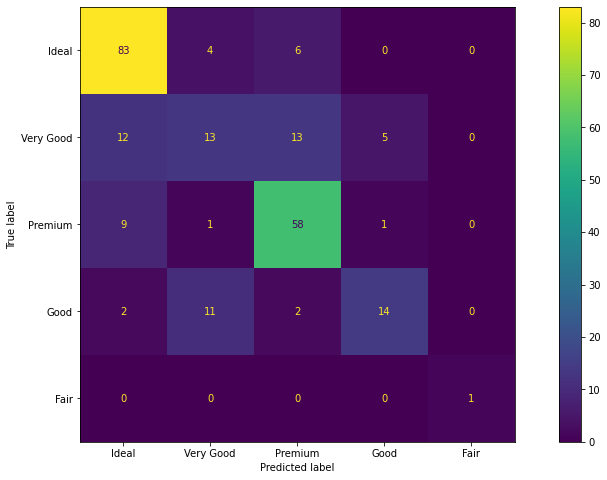

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, random_state=0, test_size=0.1)

svc = SVC(gamma="auto")
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

CM = confusion_matrix(y_test, y_pred, labels=LABELS)
disp = ConfusionMatrixDisplay(confusion_matrix=CM,display_labels=LABELS)
disp.plot()
plt.show()

In [24]:
print(classification_report(y_test, y_pred, labels=LABELS))

              precision    recall  f1-score   support

       Ideal       0.78      0.89      0.83        93
   Very Good       0.45      0.30      0.36        43
     Premium       0.73      0.84      0.78        69
        Good       0.70      0.48      0.57        29
        Fair       1.00      1.00      1.00         1

    accuracy                           0.72       235
   macro avg       0.73      0.70      0.71       235
weighted avg       0.70      0.72      0.70       235



### 1.4. Standardization
---
This is another very popular scaler and really good to deal with outliers. this method is centrilized and weighted by *standard deviation*.

$$ \large
x' = \frac{x - \overline{x}}{\sigma}
$$

where:
- $\overline{x}$ is the mean value;
- $\sigma$ is the standard deviation of $x$.

In [25]:
X_ = (X - X.mean())/X.std()
X_.describe()

,carat,depth,table,price,x,y,z
count,2.347000e+03,2.347000e+03,2.347000e+03,2.347000e+03,2.347000e+03,2.347000e+03,2.347000e+03
mean,3.148549e-16,6.627090e-15,-3.305976e-15,2.421961e-17,-2.906353e-16,-5.328314e-16,-1.937569e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.373264e+00,-1.301484e+01,-2.143861e+00,-9.834226e-01,-5.489565e+00,-5.522251e+00,-5.435444e+00
25%,-9.622131e-01,-4.562061e-01,-6.927330e-01,-8.706776e-01,-9.748422e-01,-9.804654e-01,-9.722334e-01
50%,-1.884701e-01,5.789021e-02,-2.090235e-01,-4.000156e-01,2.525454e-02,3.520821e-02,5.185948e-02
75%,6.336319e-01,5.719865e-01,7.583955e-01,5.140939e-01,7.586588e-01,7.730088e-01,7.549680e-01
max,3.124117e+00,5.933277e+00,4.628071e+00,3.470736e+00,2.387388e+00,2.344428e+00,2.558594e+00


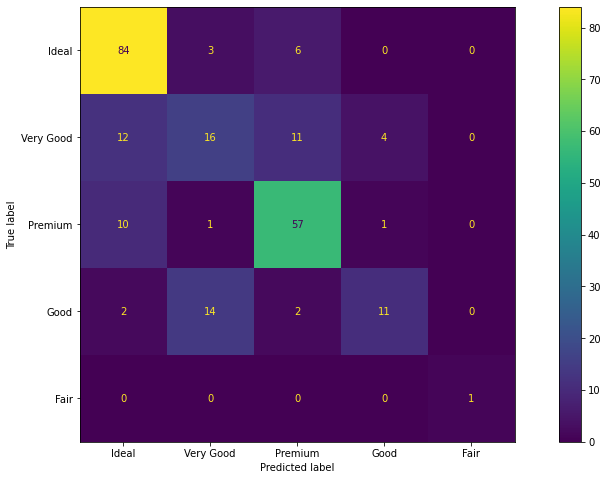

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, random_state=0, test_size=0.1)

svc = SVC(gamma="auto")
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

CM = confusion_matrix(y_test, y_pred, labels=LABELS)
disp = ConfusionMatrixDisplay(confusion_matrix=CM,display_labels=LABELS)
disp.plot()
plt.show()

In [27]:
print(classification_report(y_test, y_pred, labels=LABELS))

              precision    recall  f1-score   support

       Ideal       0.78      0.90      0.84        93
   Very Good       0.47      0.37      0.42        43
     Premium       0.75      0.83      0.79        69
        Good       0.69      0.38      0.49        29
        Fair       1.00      1.00      1.00         1

    accuracy                           0.72       235
   macro avg       0.74      0.70      0.71       235
weighted avg       0.70      0.72      0.70       235

